In [1]:
print("radhe radhe")

radhe radhe


## initialize all and all impotent thing must run    

In [43]:
import pandas as pd
from regex import P

class TemperatureDataTransformer:
    def __init__(self, data):
        """
        Initialize the class with the wide-format data.
        """
        self.df_wide = pd.DataFrame(data)

    def wide_to_long(self):
        """
        Transform the wide-format data into long format.
        """
        df_long = self.df_wide.melt(id_vars=['Year'], var_name='Month', value_name='Temperature')
        df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + df_long['Month'] + '-01')
        df_long = df_long.set_index('Date')[['Temperature']]
        df_long=df_long.sort_index()
        return df_long

    def long_to_wide(self, df_long,col):
        """
        Transform the long-format data back into wide format.
        """
        df_long = df_long.reset_index()
        
        # print(df_long)
        df_long['Year'] = df_long['Date'].dt.year
        # print(df_long['Year'])
        df_long['Index'] = df_long['Date'].dt.month_name().str[:3]
        # print(df_long['Index'])
        df_wide = df_long.pivot(index='Year', columns='Index', values=col)
        # print(df_wide)
        # Reorder columns to match the original format
        month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        df_wide = df_wide[month_order]
        # print(df_wide)
        # print(df_wide.reset_index())
        return df_wide.reset_index()


In [44]:



def plot_fig(data, inverted= False, title="",y_label ="",width=0.15,seasons={},lable_data="",l_y_pos=0.9,l_font_size=10,l_color='darkblue',ylim=[0,1.3]):
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    # Assuming your data is loaded into a DataFrame called df
    # If you haven't loaded it yet, load using:
    # df = pd.read_csv("your_file.csv", index_col=0)

    # Transpose for better plotting
    df = data # Columns become model, rows become districts
    if inverted:
        df = 1/df  # Invert the values for better visualization (if needed)

        df = (df - df.min().min()) / (df.max().max() - df.min().min())

    # Plotting
    x = np.arange(len(df.index))  # Number of districts
    width = width # Width of each bar
    model = df.columns

    plt.figure(figsize=(16, 6))

    # Create bar for each model
    for i, model in enumerate(model):
        plt.bar(x + i * width, df[model], width=width, label=model)
        
    y_pos = l_y_pos
    for s,data in seasons.items():
        
        plt.figtext(0.05, y_pos, f"{s} -> {data} -" ,
                fontsize=l_font_size, color=l_color, ha='left')
        y_pos -= 0.035  # Adjust the position for the next season text

    plt.xticks(x + width * 3, df.index, rotation=90)
    plt.ylabel(y_label)
    plt.title(title)
    plt.ylim(ylim[0], ylim[1])
    plt.legend()
    plt.tight_layout()
    plt.show()

In [88]:
from dotenv import load_dotenv
import os

load_dotenv()

# IMPORT DATASET PATH
DATASET_PATH= os.getenv("DATASET_PATH")
import pandas as pd
df=pd.read_csv(DATASET_PATH,index_col="Date",parse_dates=["Date"],dayfirst=False)

import datetime
from dateutil.relativedelta import relativedelta  # Import relativedelta

# Define the train end date
# Define the train end date
# train_end_date = datetime.datetime(1997, 12, 1)
train_end_date = datetime.datetime(1992, 12, 1)

# Calculate the test start date by adding 1 month
test_start = train_end_date + relativedelta(months=1)
train_data=df[:train_end_date]
test_data=df[test_start:]



import os
import pandas as pd

data_path = os.getenv("output_10_year")
data = {}

for root, dirs, files in os.walk(data_path):
    for f in files:
        if f.endswith('.csv'):
            path = os.path.join(root, f)
            print(path,f.removesuffix(".csv"))
            df = pd.read_csv(path,index_col="Date",parse_dates=["Date"],dayfirst=False)
            data[f.removesuffix(".csv")] = df  

rolling_predictions_window_12=data["rolling_predictions_window_12"]
sarima_no_mod=data["predict_result_no_mod"]
rolling_predictions_window_1=data["rolling_predictions_window_1"]
sarima_result_exog_pred=data["sarima_result_exog_pred"]
lstm_pred_data=data["lstm_pred_data"]
CNN_LSTM_pred_data=data["CNN_LSTM_pred_data"]
Pred_GRU= data["GRU"]
predict_result_exog_tail=data["predict_result_exog_tail"]
predict_result_roll_grow=data["predict_result_roll_grow"]
# LSTM= data["LSTM"]




models = {
    "rolling_predictions_window_12": rolling_predictions_window_12,
    "sarima_no_mod": sarima_no_mod,
    "rolling_predictions_window_1": rolling_predictions_window_1,
    "sarima_result_exog_pred": sarima_result_exog_pred,
    "lstm_pred_data": lstm_pred_data,
    "CNN_LSTM_pred_data":CNN_LSTM_pred_data
    ,"GRU":Pred_GRU,
    "predict_result_exog_tail": predict_result_exog_tail
    ,"predict_result_roll_grow": predict_result_roll_grow
    # ,"LSTM":LSTM
}

test_data_len=len(test_data)/12
test_data_len=int(test_data_len)
test_data_len

/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/rolling_predictions_window_12.csv rolling_predictions_window_12
/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/predict_result_no_mod.csv predict_result_no_mod
/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/rolling_predictions_window_1.csv rolling_predictions_window_1
/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/LSTM.csv LSTM
/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/sarima_result_exog_pred.csv sarima_result_exog_pred
/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/CNN_LSTM_pred_data.csv CNN_LSTM_pred_data
/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/predict_result_roll_grow.csv predict_result_roll_grow
/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/lstm_pred_data.csv lstm_pred_data
/home/radhe/Subha/internship/werather_forcastiing/resu

10

 ## prediction month wise 

### standard_deviation

In [6]:
import numpy as np
# from sklearn.metrics import mean_squared_error


def standard_deviation(y_true, y_pred):
    """
    Calculate the standard deviation between two sets of predictions.
    """
    std_dev = np.std(y_true - y_pred)
    return std_dev

def mean_squared_error(y_true, y_pred):
    """
    Calculate the mean squared error between two sets of predictions.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the root mean squared error between two sets of predictions.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse


def find_standard_deviation(y_true, y_pred):
    std_dev_val = {}
    for col in y_true:
        std_dev_val[col] = standard_deviation(y_true[col], y_pred[col])
    return std_dev_val
def find_rmse(y_true, y_pred):
    r2_val={}
    for col in y_true:
        r2_val[col]=root_mean_squared_error(y_true[col], y_pred[col])
    return r2_val
standard_deviation_value_months={}
for model_name, model_data in models.items():
    print(f"Model: {model_name}")
    standard_deviation_months={}
    for col in test_data.columns:
        tem=TemperatureDataTransformer(test_data)
        f1=tem.long_to_wide(test_data[col],col)
        f1.drop(columns=["Year"], inplace=True)
        tem=TemperatureDataTransformer(model_data)
        f2=tem.long_to_wide(model_data[col],col)
        f2.drop(columns=["Year"], inplace=True)
        rmse = find_standard_deviation(f1, f2)
        standard_deviation_months[col]=rmse
    standard_deviation_value_months[model_name]=standard_deviation_months
    
# print(rmse_value_months)
import json
standard_deviation_path = os.path.join(data_path, "standard_deviation_value_months.json")
with open(standard_deviation_path, "w") as f:
    json.dump(standard_deviation_value_months, f, indent=4)

with open(standard_deviation_path, "r") as f:
    models_standard_deviation= json.load(f)
    print(models_standard_deviation)    

Model: rolling_predictions_window_12
Model: sarima_no_mod
Model: rolling_predictions_window_1
Model: sarima_result_exog_pred
Model: lstm_pred_data
Model: CNN_LSTM_pred_data
{'rolling_predictions_window_12': {'Bankura_temp': {'Jan': 0.708813797658442, 'Feb': 0.7635686476087068, 'Mar': 0.93662955854008, 'Apr': 1.0837368929801194, 'May': 0.42795740339657984, 'Jun': 0.9876178138213243, 'Jul': 0.39627592135899314, 'Aug': 0.36010312818754386, 'Sep': 0.41576418576588575, 'Oct': 0.49532988735791, 'Nov': 0.6008931787644479, 'Dec': 0.4824737048107905}, 'Birbhum_temp': {'Jan': 0.6773160481426267, 'Feb': 0.7653961947998705, 'Mar': 0.7872170704585244, 'Apr': 0.9295548285150924, 'May': 0.44824462842895557, 'Jun': 0.825552557408817, 'Jul': 0.3851138524813795, 'Aug': 0.35713977623744897, 'Sep': 0.39466927050372114, 'Oct': 0.5772392043028335, 'Nov': 0.5255577110675526, 'Dec': 0.5284644719904764}, 'Burdwan_temp': {'Jan': 0.6714320794132266, 'Feb': 0.7572808286844328, 'Mar': 0.8511683035416464, 'Apr': 1.

### rmse

In [ ]:
import numpy as np
# from sklearn.metrics import mean_squared_error


def mean_squared_error(y_true, y_pred):
    """
    Calculate the mean squared error between two sets of predictions.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the root mean squared error between two sets of predictions.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def mae(y_true, y_pred):
    """
    Calculate the mean absolute error between two sets of predictions.
    """
    mae = np.mean(np.abs(y_true - y_pred))
    return mae


def find_rmse(y_true, y_pred):
    r2_val={}
    for col in y_true:
        r2_val[col]=root_mean_squared_error(y_true[col], y_pred[col])
    return r2_val
rmse_value_months={}
for model_name, model_data in models.items():
    print(f"Model: {model_name}")
    rmse_months={}
    for col in test_data.columns:
        tem=TemperatureDataTransformer(test_data)
        f1=tem.long_to_wide(test_data[col],col)
        f1.drop(columns=["Year"], inplace=True)
        tem=TemperatureDataTransformer(model_data)
        f2=tem.long_to_wide(model_data[col],col)
        f2.drop(columns=["Year"], inplace=True)
        rmse = find_rmse(f1, f2)
        rmse_months[col]=rmse
    rmse_value_months[model_name]=rmse_months
    
# print(rmse_value_months)
import json
rmse_path = os.path.join(data_path, "rmse_value_months.json")
with open(rmse_path, "w") as f:
    json.dump(rmse_value_months, f, indent=4)

with open(rmse_path, "r") as f:
    models_rmse = json.load(f)
    print(models_rmse)    

Model: rolling_predictions_window_12


Model: sarima_no_mod
Model: rolling_predictions_window_1
Model: sarima_result_exog_pred
Model: lstm_pred_data
{'rolling_predictions_window_12': {'Bankura_temp': {'Jan': 0.7112189933644307, 'Feb': 0.7687783076322623, 'Mar': 0.9438810567560131, 'Apr': 1.0906954408670688, 'May': 0.5385929823117155, 'Jun': 1.0000644165097103, 'Jul': 0.39925442866093386, 'Aug': 0.3647133069575234, 'Sep': 0.417841632842118, 'Oct': 0.6347546837254222, 'Nov': 0.8288564941562778, 'Dec': 0.6031287831312147}, 'Birbhum_temp': {'Jan': 0.6866729158937395, 'Feb': 0.7655126839744578, 'Mar': 0.7949146863968483, 'Apr': 0.974843257078293, 'May': 0.461877086830418, 'Jun': 0.8256081788401064, 'Jul': 0.3882866956225559, 'Aug': 0.40360786949111754, 'Sep': 0.43274835578645704, 'Oct': 0.598515886462841, 'Nov': 0.6476156443985153, 'Dec': 0.5930424066986216}, 'Burdwan_temp': {'Jan': 0.6808457984482517, 'Feb': 0.7580177994091446, 'Mar': 0.8517307028809659, 'Apr': 1.027303702963232, 'May': 0.4911399527883397, 'Jun': 0.841116393817

In [ ]:
X_axix= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
models_month_mae= {}
for model_name, model_data in models_rmse.items():
    print(f"Model: {model_name}")
    x_rmse = {}
    for x in X_axix:
        sum_r2 = 0
        denom = 0
        for month, rmse_value in model_data.items():
            # print(f"Month: {month}")
            # print(mse_value[x])
            
            sum_r2 += (rmse_value[x]**2)*test_data_len 
            denom+= test_data_len
        x_rmse[x] = (sum_r2/denom)**0.5   
    models_month_mae[model_name] = x_rmse    
print(models_month_mae)

### mae

In [89]:
import numpy as np
# from sklearn.metrics import mean_squared_error


def mean_squared_error(y_true, y_pred):
    """
    Calculate the mean squared error between two sets of predictions.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the root mean squared error between two sets of predictions.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def mae_(y_true, y_pred):
    """
    Calculate the mean absolute error between two sets of predictions.
    """
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def find_mae(y_true, y_pred):
    r2_val={}
    for col in y_true:
        r2_val[col]=mae_(y_true[col], y_pred[col])
    return r2_val

def find_rmse(y_true, y_pred):
    r2_val={}
    for col in y_true:
        r2_val[col]=root_mean_squared_error(y_true[col], y_pred[col])
    return r2_val
mae_value_months={}
for model_name, model_data in models.items():
    print(f"Model: {model_name}")
    mae_months={}
    for col in test_data.columns:
        tem=TemperatureDataTransformer(test_data)
        f1=tem.long_to_wide(test_data[col],col)
        f1.drop(columns=["Year"], inplace=True)
        tem=TemperatureDataTransformer(model_data)
        f2=tem.long_to_wide(model_data[col],col)
        f2.drop(columns=["Year"], inplace=True)
        mae = find_mae(f1, f2)
        mae_months[col]=mae
    mae_value_months[model_name]=mae_months
    
# print(rmse_value_months)
import json
mae_path = os.path.join(data_path, "mae_value_months.json")
with open(mae_path, "w") as f:
    json.dump(mae_value_months, f, indent=4)

Model: rolling_predictions_window_12
Model: sarima_no_mod
Model: rolling_predictions_window_1
Model: sarima_result_exog_pred
Model: lstm_pred_data
Model: CNN_LSTM_pred_data
Model: GRU
Model: predict_result_exog_tail
Model: predict_result_roll_grow


In [90]:
X_axix= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
models_month_mae= {}

with open(mae_path, "r") as f:
    models_mae = json.load(f)
    # print(models_mae)    
    
for model_name, model_data in models_mae.items():
    print(f"Model: {model_name}")
    x_mae = {}
    for x in X_axix:
        sum_r2 = 0
        denom = 0
        for month, mae_value in model_data.items():
            # print(f"Month: {month}")
            # print(mse_value[x])
            """"
            result_rmse= srt((rmse1^2* test_data_len + rmse2^2* test_data_len + rmse3^2* test_data_len)/test_data_len+test_data_len+test_data_len
            """
            sum_r2 += (mae_value[x])*test_data_len 
            denom+= test_data_len
        x_mae[x] = (sum_r2/denom)
    models_month_mae[model_name] = x_mae   
models_month_mae=pd.DataFrame(models_month_mae)
models_month_mae
    
    
# print(models_month_mae)

Model: rolling_predictions_window_12
Model: sarima_no_mod
Model: rolling_predictions_window_1
Model: sarima_result_exog_pred
Model: lstm_pred_data
Model: CNN_LSTM_pred_data
Model: GRU
Model: predict_result_exog_tail
Model: predict_result_roll_grow


,rolling_predictions_window_12,sarima_no_mod,rolling_predictions_window_1,sarima_result_exog_pred,lstm_pred_data,CNN_LSTM_pred_data,GRU,predict_result_exog_tail,predict_result_roll_grow
Jan,0.606893,0.606245,0.558386,0.610483,0.616882,0.595800,0.624753,0.963747,0.915823
Feb,0.757360,0.757760,0.750459,0.759411,1.093891,1.043763,1.332601,1.030154,1.113607
Mar,0.692797,0.693670,0.708671,0.695374,1.029379,1.103491,1.042068,0.911463,1.278801
Apr,0.832796,0.830725,0.830784,0.832556,0.901732,0.949607,0.953705,0.781044,1.179426
May,0.529246,0.529357,0.590700,0.533778,0.668900,0.759819,0.916197,0.858145,0.616083
Jun,0.574066,0.573663,0.598039,0.574294,0.653484,0.716718,0.761757,0.861875,0.795080
Jul,0.331349,0.330384,0.336962,0.333516,0.478127,0.532657,0.478479,0.486953,0.463588
Aug,0.313364,0.311465,0.354044,0.315097,0.481287,0.532185,0.534521,0.350866,0.464727
Sep,0.359357,0.358010,0.366876,0.361029,0.485286,0.512828,0.637254,0.517518,0.622789
Oct,0.465140,0.464820,0.437713,0.470072,0.604497,0.705111,0.640333,0.609658,0.640846


## Month wise analysis and plotting

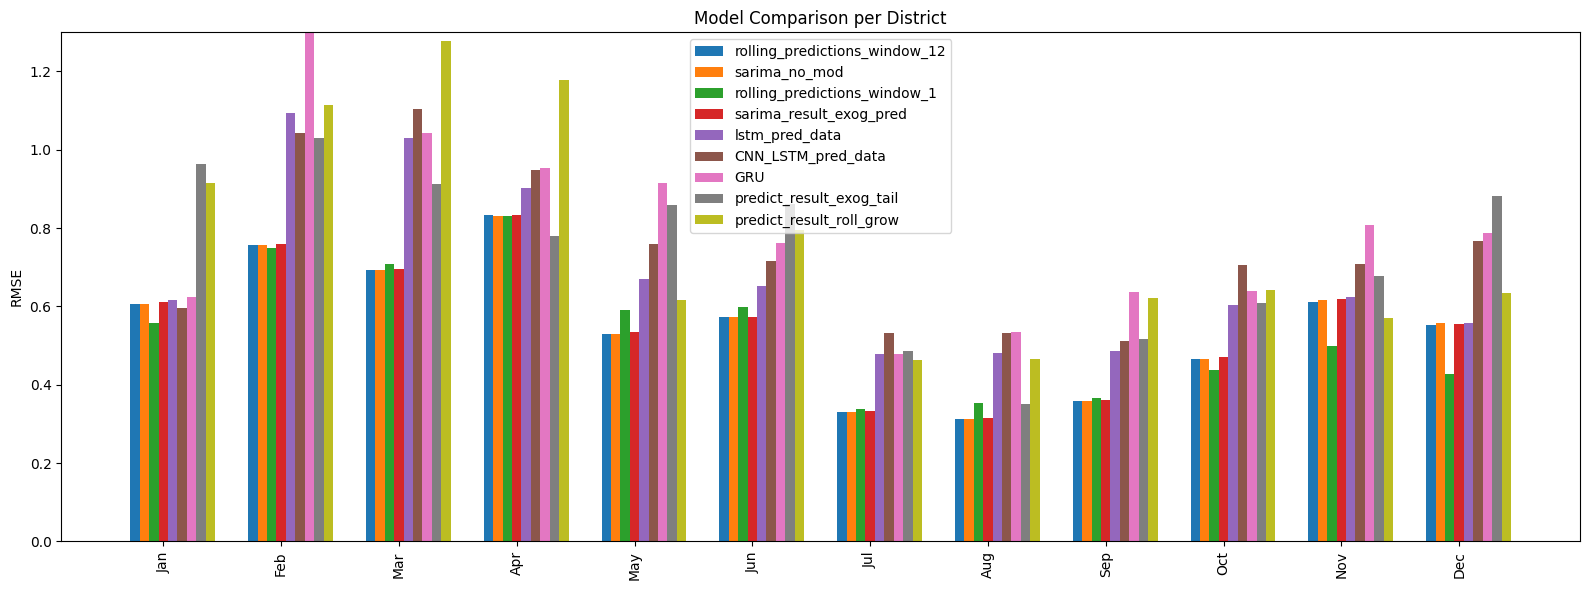

In [91]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Assuming your data is loaded into a DataFrame called df
# # If you haven't loaded it yet, load using:
# # df = pd.read_csv("your_file.csv", index_col=0)

# # Transpose for better plotting
# df = models_month_rmse # Columns become models, rows become districts
# df = 1/df  # Invert the values for better visualization (if needed)

# df = (df - df.min().min()) / (df.max().max() - df.min().min())

# # Plotting
# x = np.arange(len(df.index))  # Number of districts
# width = 0.15  # Width of each bar
# models = df.columns

# plt.figure(figsize=(16, 6))

# # Create bar for each model
# for i, model in enumerate(models):
#     plt.bar(x + i * width, df[model], width=width, label=model)

# plt.xticks(x + width * 2, df.index, rotation=90)
# plt.ylabel('RMSE')
# plt.title('Model Comparison per District')
# plt.ylim(0, 1.3)
# plt.legend()
# plt.tight_layout()
# plt.show()

from tkinter import W


plot_fig(models_month_mae,False,'Model Comparison per District','RMSE',width=.08)


#### By seasons (6) wise

In [92]:
X_axix= ['Summer', 'Monsoon', 'Autumn', 'Early_Winter', 'Winter', 'Spring']
summer=['Apr', 'May', 'Jun']
Monsoon= ['Jun', 'Jul', 'Aug']
Autumn= ['Aug', 'Sep', 'Oct']
Early_Winter= ['Oct', 'Nov', 'Dec']
Winter=['Dec', 'Jan', 'Feb']
Spring=['Feb', 'Mar', 'Apr']

seasons={
    "Summer": summer,
    "Monsoon": Monsoon,
    "Autumn": Autumn,
    "Early_Winter": Early_Winter,
    "Winter": Winter,
    "Spring": Spring
}

models_seasons_mae= {}
for model_name, model_data in models_mae.items():
    print(f"Model: {model_name}")
    print(f"Model: {model_data},")
    x_rmse = {}
    for x in X_axix:
        sum_r2 =0
        denom =0
        for dist, rmse_value in model_data.items():
            print(f"dist: {dist}")
            print(rmse_value)
            """"
            result_rmse= srt((rmse1^2* test_data_len + rmse2^2* test_data_len + rmse3^2* test_data_len)/test_data_len+test_data_len+test_data_len
            """
            sum_month = 0.0
            denom_month = 0.0
            # print(f"Season: {x}")
            month_mae= 0
            for month in seasons[x]:
                # print(f"Month: {month}")
                # print(rmse_value[month])
                sum_month += (rmse_value[month])*test_data_len 
                denom_month+= test_data_len
            
            month_mae = (sum_month/denom_month)
            sum_r2 += month_mae * test_data_len*len(seasons[x])
            denom += test_data_len*len(seasons[x])
        x_rmse[x] = (sum_r2/denom)
    models_seasons_mae[model_name] = x_rmse
        
    

Model: rolling_predictions_window_12
Model: {'Bankura_temp': {'Jan': 0.6668674890863564, 'Feb': 0.6909861855821866, 'Mar': 0.7550123256626187, 'Apr': 0.9145380320202833, 'May': 0.3671867361813373, 'Jun': 0.801133915519074, 'Jul': 0.3324422561508705, 'Aug': 0.31254374959261105, 'Sep': 0.3619296229648096, 'Oct': 0.4542060287404649, 'Nov': 0.6127997758546648, 'Dec': 0.4915570830485304}, 'Birbhum_temp': {'Jan': 0.5416762168183084, 'Feb': 0.6949508317615916, 'Mar': 0.6338780155800585, 'Apr': 0.8065243772512669, 'May': 0.39532950326021493, 'Jun': 0.655922350014048, 'Jul': 0.3210732518008438, 'Aug': 0.32394139135244904, 'Sep': 0.3938445995732128, 'Oct': 0.43336632694756005, 'Nov': 0.49449423749376004, 'Dec': 0.5212917959517739}, 'Burdwan_temp': {'Jan': 0.5736404454311362, 'Feb': 0.6891323002477243, 'Mar': 0.6670222458226227, 'Apr': 0.8702512031855221, 'May': 0.405396962083049, 'Jun': 0.6696835001776869, 'Jul': 0.2913044176700577, 'Aug': 0.2985549896804695, 'Sep': 0.3964029923176593, 'Oct': 0.

In [93]:
models_seasons_mae= pd.DataFrame(models_seasons_mae)

In [94]:
from ast import mod


models_seasons_mae.T


,Summer,Monsoon,Autumn,Early_Winter,Winter,Spring
rolling_predictions_window_12,0.645369,0.406259,0.379287,0.542984,0.638596,0.760984
sarima_no_mod,0.644582,0.405171,0.378098,0.546325,0.640274,0.760719
rolling_predictions_window_1,0.673174,0.429682,0.386211,0.454432,0.578890,0.763304
sarima_result_exog_pred,0.646876,0.407636,0.382066,0.547729,0.641602,0.762447
lstm_pred_data,0.741372,0.537632,0.523690,0.594901,0.755941,1.008334
CNN_LSTM_pred_data,0.808715,0.593853,0.583375,0.726599,0.802184,1.032287
GRU,0.877220,0.591586,0.604036,0.745233,0.915137,1.109458
predict_result_exog_tail,0.833688,0.566565,0.492681,0.723171,0.959060,0.907554
predict_result_roll_grow,0.863530,0.574465,0.576120,0.614795,0.887745,1.190611


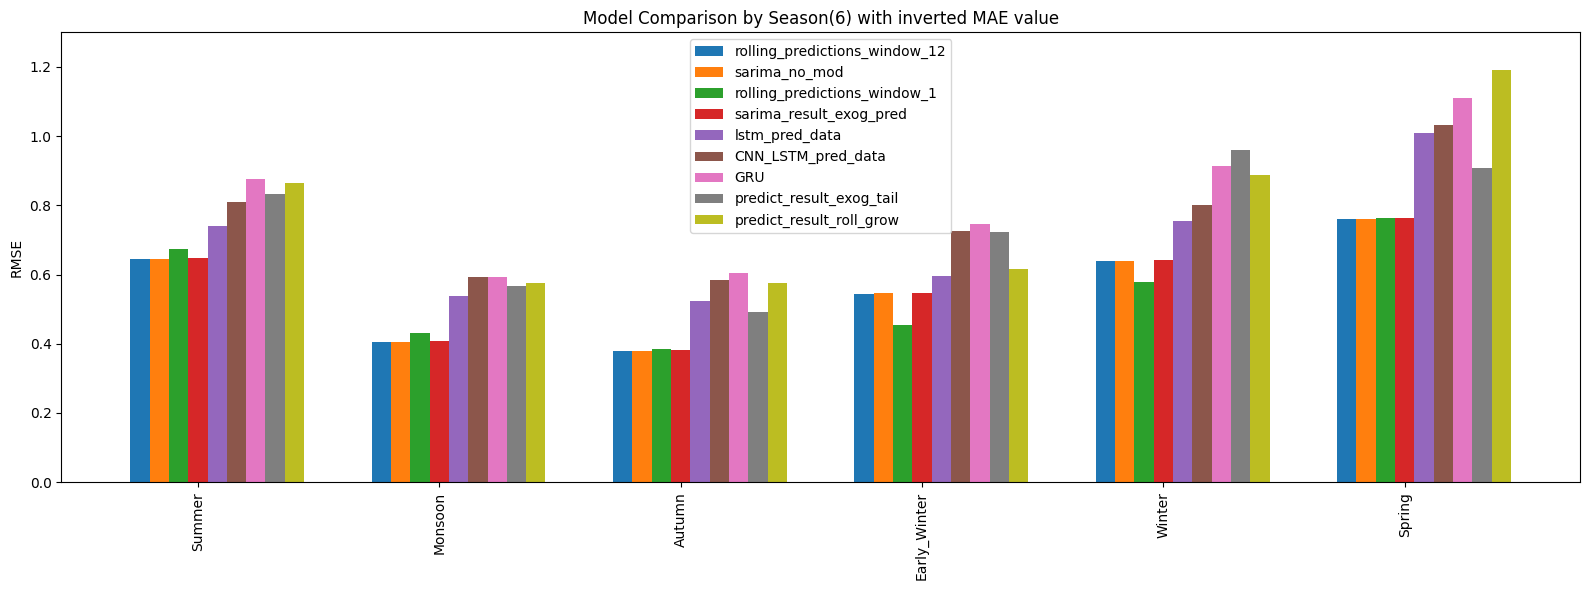

In [95]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Assuming your data is loaded into a DataFrame called df
# # If you haven't loaded it yet, load using:
# # df = pd.read_csv("your_file.csv", index_col=0)

# # Transpose for better plotting
# df = models_seasons_rmse # Columns become models, rows become districts
# df = 1/df  # Invert the values for better visualization (if needed)

# df = (df - df.min().min()) / (df.max().max() - df.min().min())

# # Plotting
# x = np.arange(len(df.index))  # Number of districts
# width = 0.15  # Width of each bar
# models = df.columns

# plt.figure(figsize=(16, 6))

# # Create bar for each model
# for i, model in enumerate(models):
#     plt.bar(x + i * width, df[model], width=width, label=model)

# plt.xticks(x + width * 2, df.index, rotation=90)
# plt.ylabel('RMSE')
# plt.title('Model Comparison per District')
# plt.ylim(0, 1.3)
# plt.legend()
# y_pos = 0.9
# for s,data in seasons.items():
    
#     plt.figtext(0.05, y_pos, f"{s} -> {data} -" ,
#             fontsize=10, color='darkblue', ha='left')
#     y_pos -= 0.035  # Adjust the position for the next season text

# plt.tight_layout()
# plt.show()

plot_fig(models_seasons_mae,False,"Model Comparison by Season(6) with inverted MAE value",'RMSE',width=.08)


#### By seasons (4) wise

In [96]:
X_axix= ['Summer', 'Monsoon', 'Autumn', 'Winter']
summer=['Mar','Apr', 'May', 'Jun']
Monsoon= ['Jun', 'Jul', 'Aug','Sep']
Autumn= ['Oct', 'Nov']
Winter=['Dec', 'Jan', 'Feb']
seasons={
    "Summer": summer,
    "Monsoon": Monsoon,
    "Autumn": Autumn,
    "Winter": Winter,
}

models_seasons_mae= {}
for model_name, model_data in models_mae.items():
    print(f"Model: {model_name}")
    x_mae = {}
    for x in X_axix:
        sum_r2 =0
        denom =0
        for dist, mae_value in model_data.items():
            # print(f"dist: {dist}")
            # print(mse_value[x])
            """"
            result_rmse= srt((rmse1^2* test_data_len + rmse2^2* test_data_len + rmse3^2* test_data_len)/test_data_len+test_data_len+test_data_len
            """
            sum_month = 0
            denom_month = 0
            # print(f"Season: {x}")
            month_mae= 0
            for month in seasons[x]:
                # print(f"Month: {month}")
                # print(rmse_value[month])
                sum_month += (mae_value[month])*test_data_len 
                denom_month+= test_data_len
            
            month_mae = (sum_month/denom_month)
            sum_r2 += month_mae * test_data_len*len(seasons[x])
            denom += test_data_len*len(seasons[x])
        x_mae[x] = (sum_r2/denom)
    models_seasons_mae[model_name] = x_mae
models_seasons_mae= pd.DataFrame(models_seasons_mae)
models_seasons_mae.T

Model: rolling_predictions_window_12
Model: sarima_no_mod
Model: rolling_predictions_window_1
Model: sarima_result_exog_pred
Model: lstm_pred_data
Model: CNN_LSTM_pred_data
Model: GRU
Model: predict_result_exog_tail
Model: predict_result_roll_grow


,Summer,Monsoon,Autumn,Winter
rolling_predictions_window_12,0.657226,0.394534,0.538707,0.638596
sarima_no_mod,0.656854,0.393381,0.541079,0.640274
rolling_predictions_window_1,0.682048,0.413980,0.467735,0.578890
sarima_result_exog_pred,0.659001,0.395984,0.544138,0.641602
lstm_pred_data,0.813374,0.524546,0.613827,0.755941
CNN_LSTM_pred_data,0.882409,0.573597,0.706404,0.802184
GRU,0.918432,0.603003,0.723822,0.915137
predict_result_exog_tail,0.853132,0.554303,0.643117,0.959060
predict_result_roll_grow,0.967348,0.586546,0.605291,0.887745


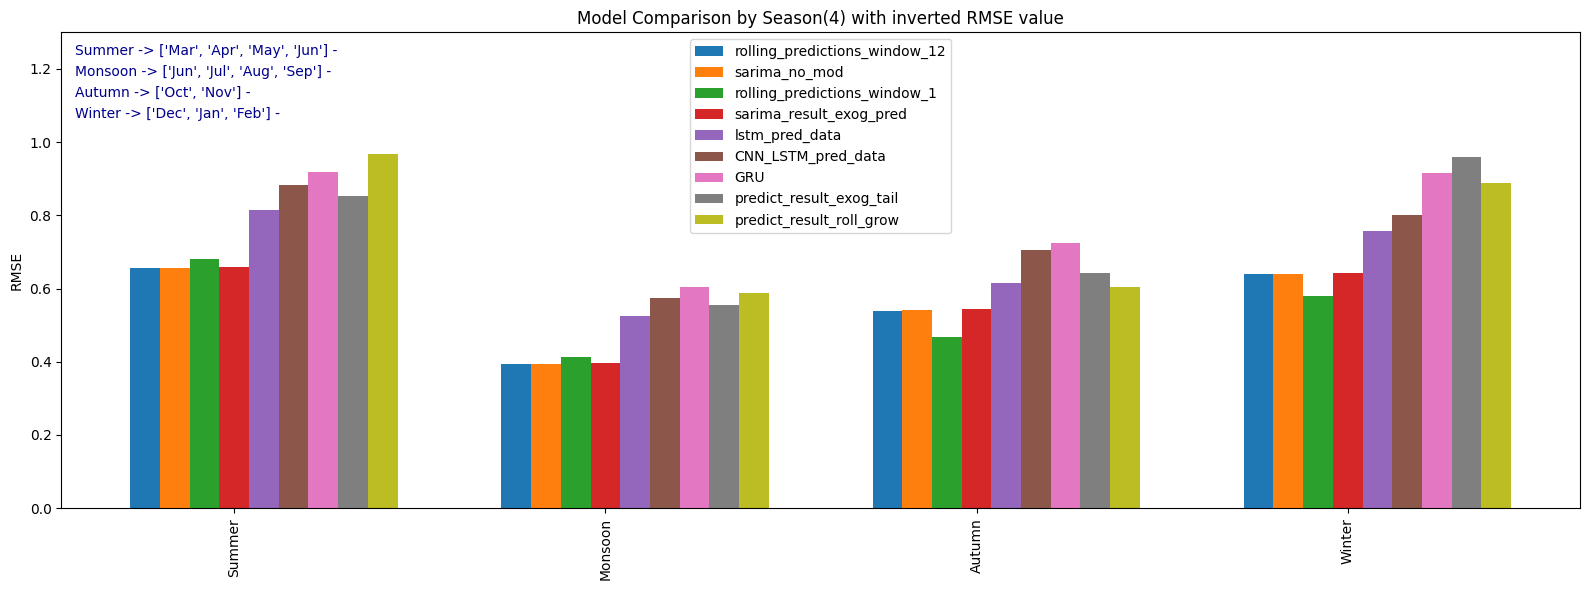

In [97]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Assuming your data is loaded into a DataFrame called df
# # If you haven't loaded it yet, load using:
# # df = pd.read_csv("your_file.csv", index_col=0)

# # Transpose for better plotting
# df = models_seasons_rmse # Columns become models, rows become districts
# df = 1/df  # Invert the values for better visualization (if needed)

# df = (df - df.min().min()) / (df.max().max() - df.min().min())

# # Plotting
# x = np.arange(len(df.index))  # Number of districts
# width = 0.15  # Width of each bar
# models = df.columns

# plt.figure(figsize=(16, 6))

# # Create bar for each model
# for i, model in enumerate(models):
#     plt.bar(x + i * width, df[model], width=width, label=model)

# plt.xticks(x + width * 2, df.index, rotation=90)
# plt.ylabel('RMSE')
# plt.title('Model Comparison per District')
# # plt.ylim(0, 1.3)
# plt.legend()
# y_pos = 0.9
# for s,data in seasons.items():
    
#     plt.figtext(0.05, y_pos, f"{s} -> {data} -" ,
#             fontsize=10, color='darkblue', ha='left')
#     y_pos -= 0.035  # Adjust the position for the next season text

# plt.tight_layout()
# plt.show()

plot_fig(models_seasons_mae,False,"Model Comparison by Season(4) with inverted RMSE value",'RMSE',seasons=seasons,width=.08)


## prediction place wise 

In [67]:
# from sklearn.metrics import r2_score
from sympy import im

def r2_score(y_true, y_pred):
    # manually calculate R2 score
    ss_res = ((y_true - y_pred) ** 2).sum()
    ss_tot = ((y_true - y_true.mean()) ** 2).sum()
    r2 = 1 - (ss_res / ss_tot)
    return r2

def find_r2(y_true, y_pred):
    r2_val={}
    for col in y_true:
        r2_val[col]=r2_score(y_true[col], y_pred[col])
    return r2_val



models_mae={}
for model_name, model_data in models.items():
    models_mae[model_name]=find_mae(test_data,model_data)

In [68]:
models_mae_df = pd.DataFrame(models_mae)

In [69]:
models_mae_df.T

,Bankura_temp,Birbhum_temp,Burdwan_temp,Darjeeling_temp,Hooghly_temp,Howrah_temp,Jalpaiguri_temp,Kochbihar_temp,Kolkata_temp,Malda_temp,Medinipur_temp,Murshidabad_temp,Nadia_temp,North-24-Parganas_temp,North-Dinajpur_temp,Purulia_temp,South-24-Parganas_temp,South-Dinajpur_temp
rolling_predictions_window_12,0.563434,0.518024,0.516036,0.680486,0.523608,0.520791,0.696744,0.613873,0.527118,0.556172,0.519548,0.518686,0.509959,0.495806,0.553087,0.624908,0.420591,0.580395
sarima_no_mod,0.565752,0.518963,0.516299,0.669706,0.522074,0.521735,0.664503,0.661834,0.528397,0.549586,0.518710,0.519438,0.509934,0.493452,0.569377,0.627419,0.417079,0.571124
rolling_predictions_window_1,0.571162,0.530534,0.532269,0.613687,0.541273,0.541326,0.572494,0.546081,0.549581,0.527411,0.515845,0.515155,0.512883,0.510997,0.522950,0.623476,0.435312,0.524889
sarima_result_exog_pred,0.570493,0.516842,0.517871,0.643189,0.523334,0.519582,0.704440,0.675733,0.526445,0.561514,0.540463,0.519596,0.507015,0.500150,0.563290,0.621570,0.417077,0.559482
lstm_pred_data,0.991173,0.575934,0.624340,0.916694,0.823434,0.642346,0.643673,0.578558,0.668422,0.765137,0.635082,0.604953,0.636390,0.566348,0.599624,0.669403,0.698388,0.650601
CNN_LSTM_pred_data,0.775148,0.718063,0.620292,0.902800,0.721487,0.793139,0.881932,0.864931,0.662999,0.788774,0.599802,0.778013,0.687093,0.585389,0.875249,0.816869,0.529290,0.788728
GRU,0.664781,0.867683,1.023783,1.009306,0.839619,0.602983,1.014689,0.939111,0.798578,0.697769,0.711800,0.743919,0.718931,0.790099,0.636329,0.807642,0.610715,0.797817
predict_result_exog_tail,0.728676,0.730940,0.706512,0.927637,0.682486,0.671551,0.922921,0.931686,0.692514,0.785137,0.643583,0.754541,0.723924,0.672416,0.821225,0.786329,0.416964,0.797875
predict_result_roll_grow,0.795387,0.776816,0.770052,0.854073,0.777343,0.769541,0.851988,0.824528,0.782873,0.810611,0.736006,0.779560,0.771823,0.740795,0.817202,0.824570,0.422324,0.835972
LSTM,0.824189,0.732674,0.784845,0.974236,0.708701,0.824446,0.783695,0.961634,0.744079,0.880989,0.710385,0.746301,0.751695,0.628233,0.913588,0.777005,0.554737,0.840186


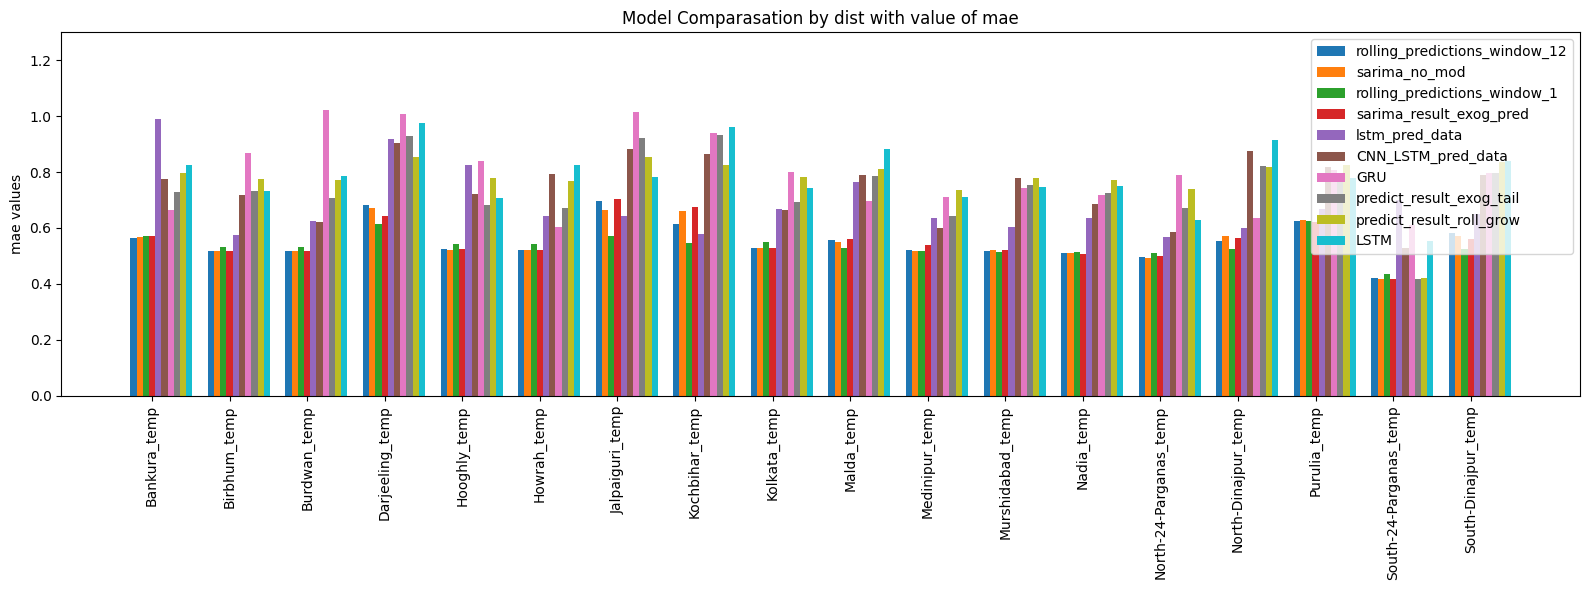

In [71]:
plot_fig(models_mae_df,False,"Model Comparasation by dist with value of mae","mae values",width=.08)

In [77]:
class place_analyse_r2:
    def __init__(self, region_data, models_r2):
        self.region_data = region_data
        self.models_r2 = models_r2
        self.models_regions_r2 = {}
        self._analysed = False   # ✅ Track whether analyse() is called

    def analyse(self):
        for model, model_r2 in self.models_r2.items():
            # print(f"Model: {model}")
            regions_r2 = {}
            for region, districts in self.region_data.items():
                regions_r2[region] = sum(model_r2[col] for col in districts) / len(districts)
            self.models_regions_r2[model] = regions_r2
        self._analysed = True   # ✅ Mark as analysed
        return self.models_regions_r2
    
    def to_dataframe(self):
        if not self._analysed:
            raise RuntimeError("❌ You must call analyse() before converting to dataframe.")
        import pandas as pd
        return pd.DataFrame(self.models_regions_r2)
    

    def plot_fig(self, title="", y_label="", width=0.15,
                seasons={}, lable_data="", l_y_pos=0.9, l_font_size=10,
                l_color='darkblue', ylim=[0, 1],rot=0):
        if not self._analysed:
            raise RuntimeError("❌ You must call analyse() before plotting.")

        import matplotlib.pyplot as plt
        import pandas as pd
        import numpy as np
        
        data = self.to_dataframe()

        df = data
        x = np.arange(len(df.index))  # Number of regions
        model = df.columns

        plt.figure(figsize=(16, 6))

        # ✅ Create bar chart for each model
        for i, model in enumerate(model):
            plt.bar(x + i * width, df[model], width=width, label=model)
            
        # ✅ Add seasonal text info
        y_pos = l_y_pos
        for s, data in seasons.items():
            plt.figtext(0.05, y_pos, f"{s} -> {data} -",
                        fontsize=l_font_size, color=l_color, ha='left')
            y_pos -= 0.035

        plt.xticks(x + width * 3, df.index, rotation=rot)
        plt.ylabel(y_label)
        plt.title(title)
        plt.ylim(ylim[0], ylim[1])
        plt.legend()
        plt.tight_layout()
        plt.show()


### by regions

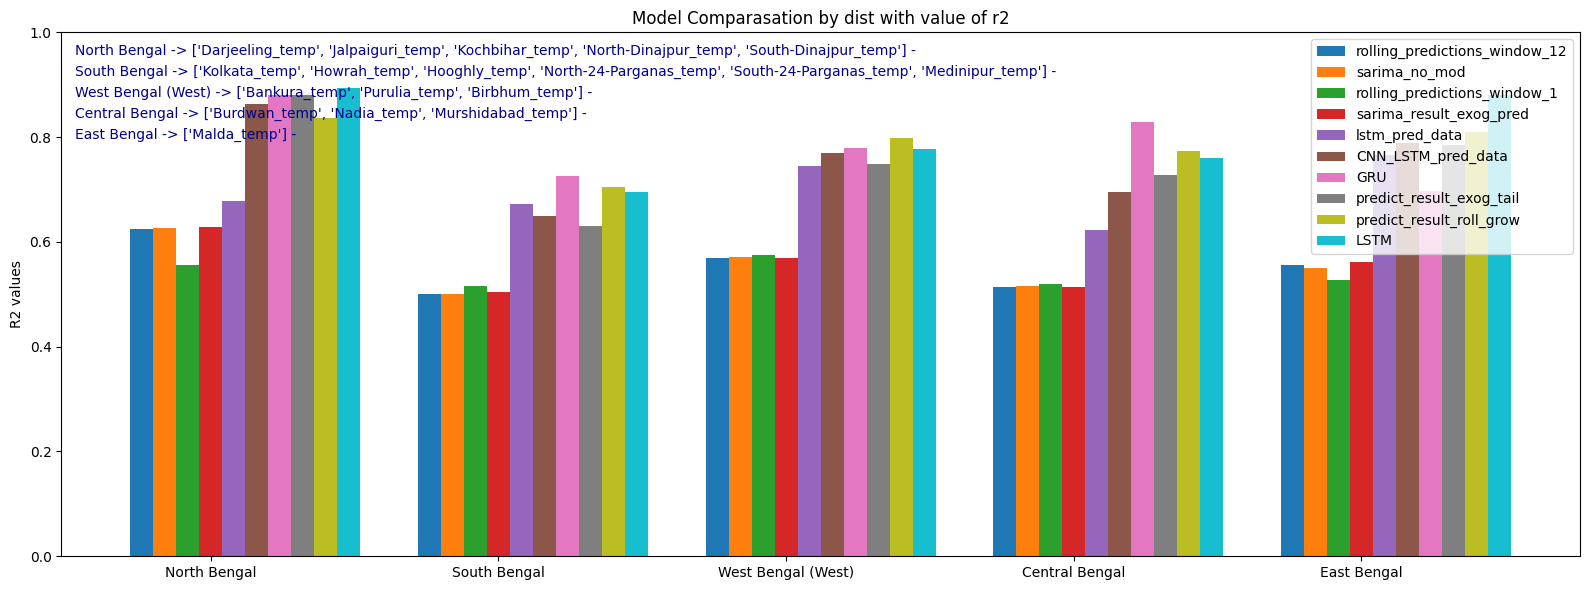

,rolling_predictions_window_12,sarima_no_mod,rolling_predictions_window_1,sarima_result_exog_pred,lstm_pred_data,CNN_LSTM_pred_data,GRU,predict_result_exog_tail,predict_result_roll_grow,LSTM
North Bengal,0.624917,0.627309,0.556020,0.629227,0.677830,0.862728,0.879450,0.880269,0.836753,0.894668
South Bengal,0.501244,0.500241,0.515722,0.504509,0.672337,0.648684,0.725632,0.629919,0.704814,0.695097
West Bengal (West),0.568789,0.570711,0.575057,0.569635,0.745503,0.770027,0.780035,0.748648,0.798925,0.777956
Central Bengal,0.514894,0.515224,0.520102,0.514827,0.621895,0.695133,0.828878,0.728326,0.773811,0.760947
East Bengal,0.556172,0.549586,0.527411,0.561514,0.765137,0.788774,0.697769,0.785137,0.810611,0.880989


In [79]:

north_bengal = [
    'Darjeeling_temp',
    'Jalpaiguri_temp',
    'Kochbihar_temp',        # Cooch Behar
    'North-Dinajpur_temp',   # Uttar Dinajpur
    'South-Dinajpur_temp'    # Dakshin Dinajpur
    # (Alipurduar_temp & Kalimpong_temp are missing from your list)
]

south_bengal = [
    'Kolkata_temp',
    'Howrah_temp',
    'Hooghly_temp',
    'North-24-Parganas_temp',
    'South-24-Parganas_temp',
    'Medinipur_temp'        # Covers Purba & Paschim Medinipur
]

west_bengal_west = [
    'Bankura_temp',
    'Purulia_temp',
    'Birbhum_temp'
    # (Jhargram_temp is missing from your list)
]

central_bengal = [
    'Burdwan_temp',         # Covers Purba & Paschim Bardhaman
    'Nadia_temp',
    'Murshidabad_temp'
]

east_bengal = [
    'Malda_temp'
]

regions = [
    "North Bengal",
    "South Bengal",
    "West Bengal (West)",
    "Central Bengal",
    "East Bengal"
]
region_data = {
    "North Bengal": north_bengal,
    "South Bengal": south_bengal,
    "West Bengal (West)": west_bengal_west,
    "Central Bengal": central_bengal,
    "East Bengal": east_bengal
}

pa=place_analyse_r2(region_data, models_mae)
pa.analyse()
pa.plot_fig(title="Model Comparasation by dist with value of r2", y_label="R2 values",seasons=region_data,rot=0,width=.08)
pa.to_dataframe()

### rainfall_categories

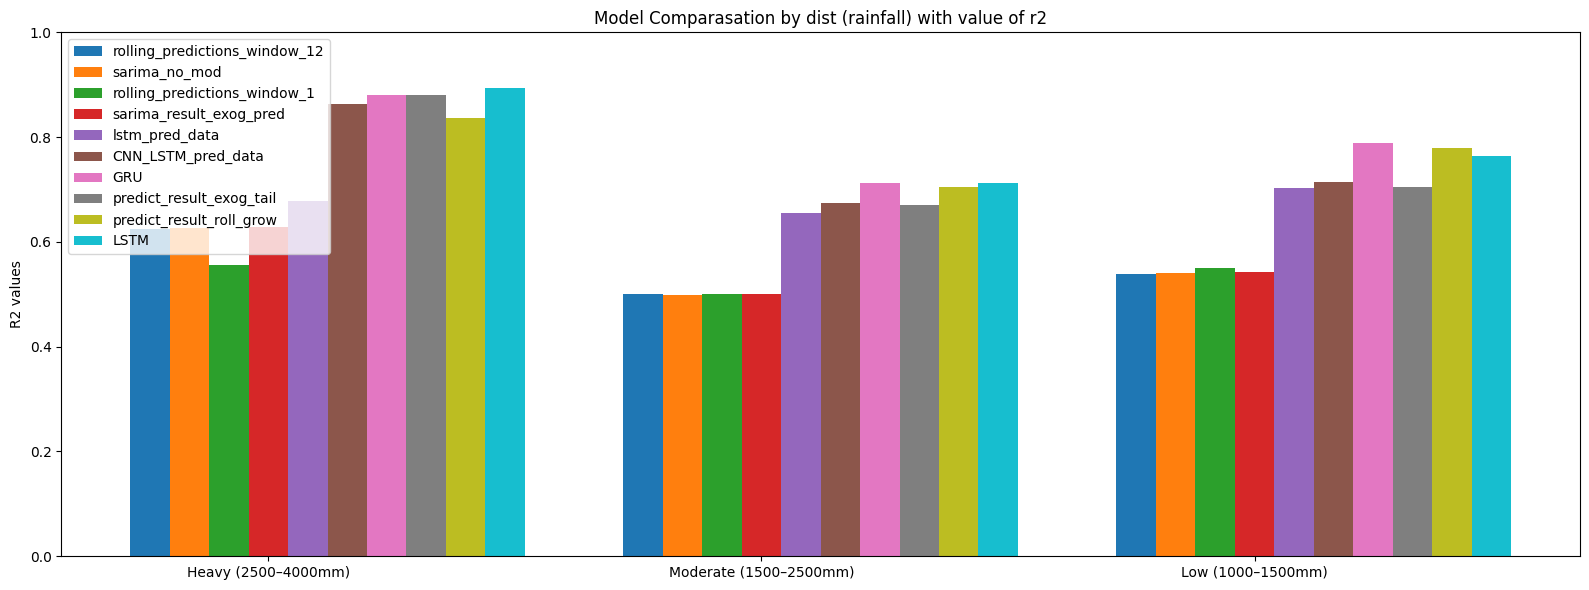

,rolling_predictions_window_12,sarima_no_mod,rolling_predictions_window_1,sarima_result_exog_pred,lstm_pred_data,CNN_LSTM_pred_data,GRU,predict_result_exog_tail,predict_result_roll_grow,LSTM
Heavy (2500–4000mm),0.624917,0.627309,0.556020,0.629227,0.677830,0.862728,0.879450,0.880269,0.836753,0.894668
Moderate (1500–2500mm),0.500243,0.497898,0.500352,0.501070,0.654243,0.673712,0.712287,0.670597,0.705022,0.712391
Low (1000–1500mm),0.539183,0.539919,0.550683,0.542075,0.703767,0.713475,0.789609,0.705324,0.779074,0.763291


In [82]:
rainfall_data = {
    "Heavy (2500–4000mm)": [
        "Darjeeling_temp", "Jalpaiguri_temp", "Kochbihar_temp",
        "North-Dinajpur_temp", "South-Dinajpur_temp"
    ],
    "Moderate (1500–2500mm)": [
        "Malda_temp", "Murshidabad_temp", "Nadia_temp",
        "South-24-Parganas_temp", "North-24-Parganas_temp"
    ],
    "Low (1000–1500mm)": [
        "Kolkata_temp", "Howrah_temp", "Hooghly_temp",
        "Medinipur_temp", "Birbhum_temp", "Bankura_temp",
        "Burdwan_temp", "Purulia_temp"
    ]
}

place_rain=place_analyse_r2(rainfall_data, models_mae)
place_rain.analyse()
place_rain.plot_fig(title="Model Comparasation by dist (rainfall) with value of r2", y_label="R2 values",rot=0,width=.08)
place_rain.to_dataframe()

### 💧 Humidity Data

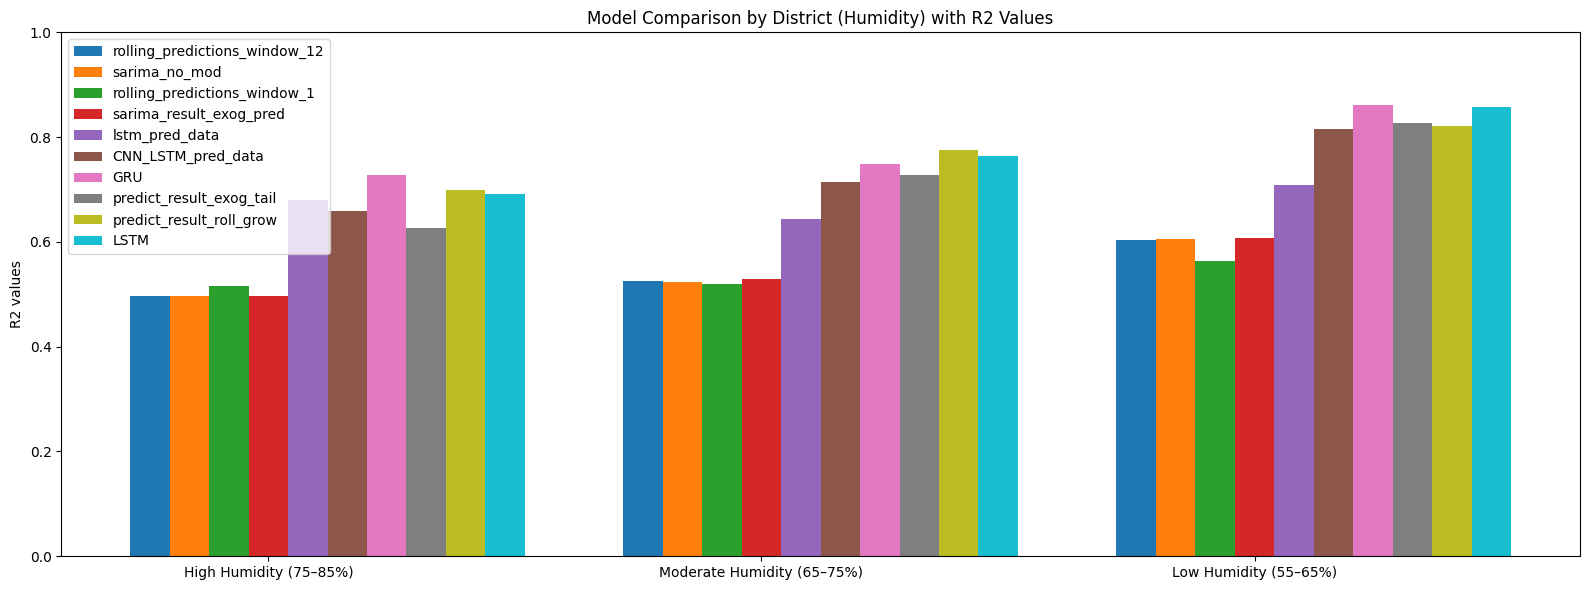

,rolling_predictions_window_12,sarima_no_mod,rolling_predictions_window_1,sarima_result_exog_pred,lstm_pred_data,CNN_LSTM_pred_data,GRU,predict_result_exog_tail,predict_result_roll_grow,LSTM
High Humidity (75–85%),0.497583,0.496548,0.515698,0.497318,0.679788,0.658461,0.728399,0.627186,0.698575,0.692039
Moderate Humidity (65–75%),0.524478,0.523326,0.520366,0.529086,0.643499,0.714349,0.748020,0.727625,0.774963,0.764409
Low Humidity (55–65%),0.603620,0.605752,0.563376,0.607008,0.709258,0.815744,0.861682,0.827858,0.821722,0.857422


In [85]:
# 💧 Humidity Data
humidity_data = {
    "High Humidity (75–85%)": [
        "Kolkata_temp", "Howrah_temp", "Hooghly_temp",
        "North-24-Parganas_temp", "South-24-Parganas_temp"
    ],
    "Moderate Humidity (65–75%)": [
        "Murshidabad_temp", "Nadia_temp", "Malda_temp",
        "Medinipur_temp", "Birbhum_temp"
    ],
    "Low Humidity (55–65%)": [
        "Bankura_temp", "Burdwan_temp", "Purulia_temp",
        "Darjeeling_temp", "Jalpaiguri_temp", "Kochbihar_temp",
        "North-Dinajpur_temp", "South-Dinajpur_temp"
    ]
}
# 💧 HUMIDITY
place_humidity = place_analyse_r2(humidity_data, models_mae)
place_humidity.analyse()
place_humidity.plot_fig(title="Model Comparison by District (Humidity) with R2 Values",
                        y_label="R2 values",
                        
                        seasons={},rot=0,width=.08)
place_humidity.to_dataframe()


### 🌫 Pollution Data

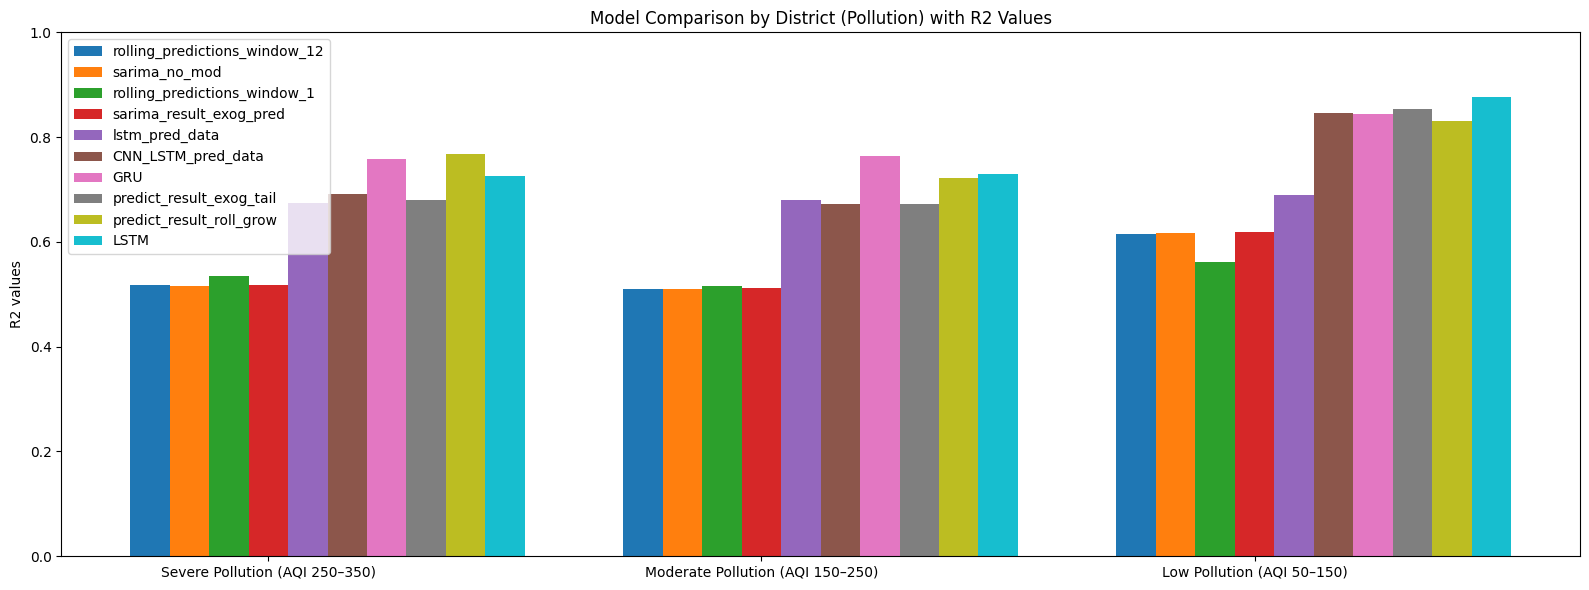

,rolling_predictions_window_12,sarima_no_mod,rolling_predictions_window_1,sarima_result_exog_pred,lstm_pred_data,CNN_LSTM_pred_data,GRU,predict_result_exog_tail,predict_result_roll_grow,LSTM
Severe Pollution (AQI 250–350),0.516831,0.516415,0.535794,0.517378,0.675138,0.690753,0.757820,0.679742,0.767638,0.726365
Moderate Pollution (AQI 150–250),0.509468,0.509454,0.516166,0.512765,0.680894,0.672529,0.763088,0.672163,0.721710,0.729261
Low Pollution (AQI 50–150),0.615095,0.616221,0.561570,0.618460,0.689099,0.845612,0.843238,0.853259,0.831278,0.875905


In [87]:

# 🌫 Pollution Data
pollution_data = {
    "Severe Pollution (AQI 250–350)": [
        "Kolkata_temp", "Howrah_temp", "North-24-Parganas_temp", "Hooghly_temp"
    ],
    "Moderate Pollution (AQI 150–250)": [
        "South-24-Parganas_temp", "Burdwan_temp", "Murshidabad_temp",
        "Nadia_temp", "Medinipur_temp", "Birbhum_temp", "Bankura_temp"
    ],
    "Low Pollution (AQI 50–150)": [
        "Darjeeling_temp", "Jalpaiguri_temp", "Kochbihar_temp",
        "North-Dinajpur_temp", "South-Dinajpur_temp", "Malda_temp",
        "Purulia_temp"
    ]
}


# 🌫 POLLUTION
place_pollution = place_analyse_r2(pollution_data, models_mae)
place_pollution.analyse()
place_pollution.plot_fig(title="Model Comparison by District (Pollution) with R2 Values",
                        y_label="R2 values",
                        width=.08,rot=0)
place_pollution.to_dataframe()


### 🏞 Region Data

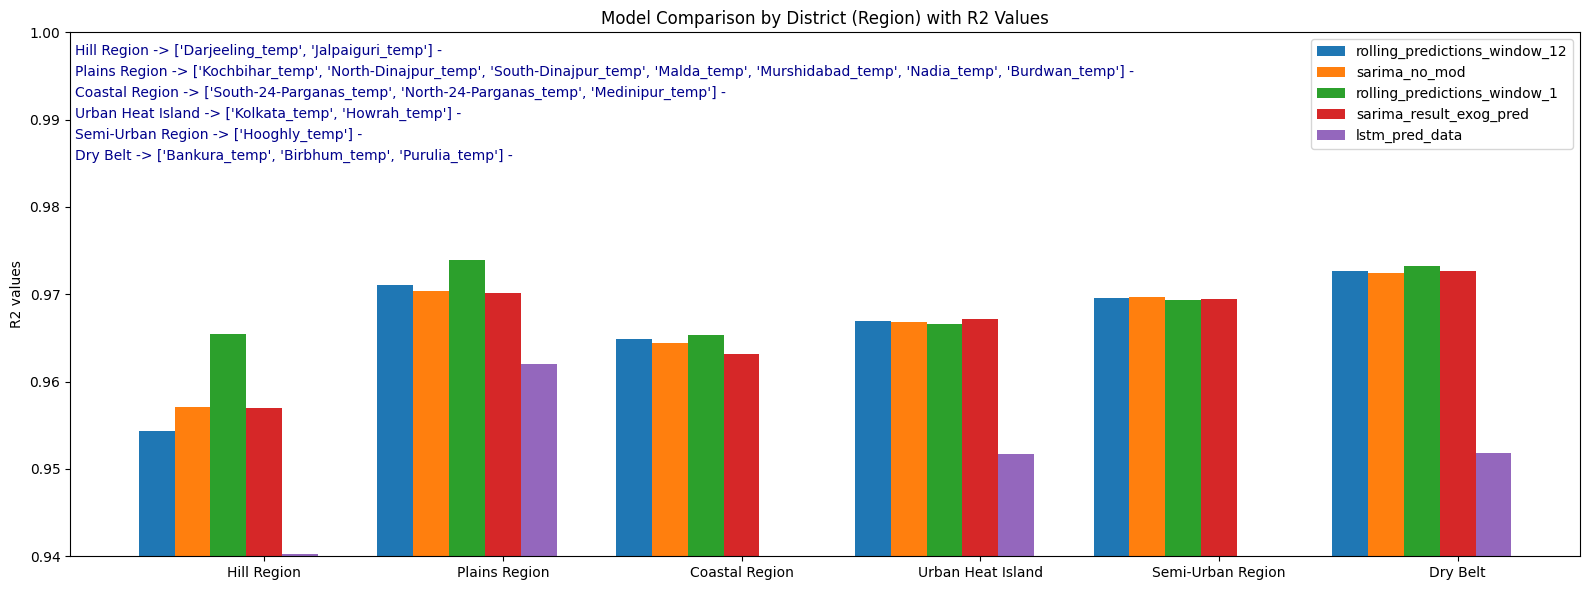

,rolling_predictions_window_12,sarima_no_mod,rolling_predictions_window_1,sarima_result_exog_pred,lstm_pred_data
Hill Region,0.954313,0.957079,0.965434,0.956940,0.940285
Plains Region,0.971017,0.970325,0.973896,0.970154,0.962061
Coastal Region,0.964847,0.964461,0.965364,0.963157,0.936907
Urban Heat Island,0.966919,0.966830,0.966555,0.967191,0.951671
Semi-Urban Region,0.969577,0.969722,0.969362,0.969501,0.927174
Dry Belt,0.972623,0.972475,0.973188,0.972655,0.951871


In [ ]:
# 🏞 Region Data
region_data = {
    "Hill Region": ["Darjeeling_temp", "Jalpaiguri_temp"],
    "Plains Region": ["Kochbihar_temp", "North-Dinajpur_temp", "South-Dinajpur_temp",
                      "Malda_temp", "Murshidabad_temp", "Nadia_temp", "Burdwan_temp"],
    "Coastal Region": ["South-24-Parganas_temp", "North-24-Parganas_temp", "Medinipur_temp"],
    "Urban Heat Island": ["Kolkata_temp", "Howrah_temp"],
    "Semi-Urban Region": ["Hooghly_temp"],
    "Dry Belt": ["Bankura_temp", "Birbhum_temp", "Purulia_temp"]
}

# 🏞 REGION
place_region = place_analyse_r2(region_data, models_mae)
place_region.analyse()
place_region.plot_fig(title="Model Comparison by District (Region) with R2 Values",
                      y_label="R2 values",
                      ylim=[.94,1],
                      seasons=region_data)
place_region.to_dataframe()


### 🔥 Heatwave Risk

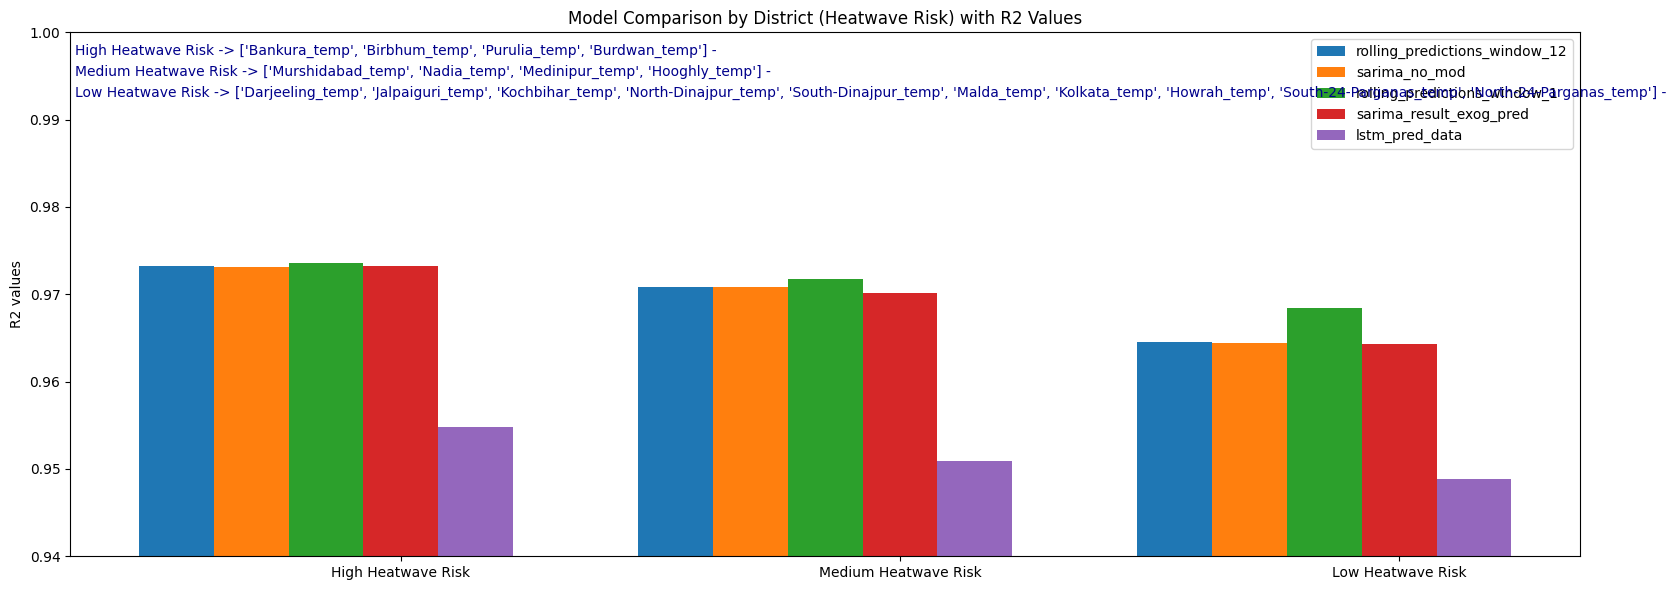

,rolling_predictions_window_12,sarima_no_mod,rolling_predictions_window_1,sarima_result_exog_pred,lstm_pred_data
High Heatwave Risk,0.973253,0.973139,0.973624,0.973235,0.954846
Medium Heatwave Risk,0.970817,0.970858,0.971778,0.970128,0.950923
Low Heatwave Risk,0.964529,0.964464,0.968466,0.964283,0.948877


In [ ]:
# 🔥 Heatwave Risk
heatwave_data = {
    "High Heatwave Risk": ["Bankura_temp", "Birbhum_temp", "Purulia_temp", "Burdwan_temp"],
    "Medium Heatwave Risk": ["Murshidabad_temp", "Nadia_temp", "Medinipur_temp", "Hooghly_temp"],
    "Low Heatwave Risk": ["Darjeeling_temp", "Jalpaiguri_temp", "Kochbihar_temp",
                          "North-Dinajpur_temp", "South-Dinajpur_temp", "Malda_temp",
                          "Kolkata_temp", "Howrah_temp", "South-24-Parganas_temp", "North-24-Parganas_temp"]
}

# 🔥 HEATWAVE RISK
place_heatwave = place_analyse_r2(heatwave_data, models_mae)
place_heatwave.analyse()
place_heatwave.plot_fig(title="Model Comparison by District (Heatwave Risk) with R2 Values",
                        y_label="R2 values",
                        ylim=[.94,1],
                        seasons=heatwave_data)
place_heatwave.to_dataframe()


### ❄ Coldwave Risk

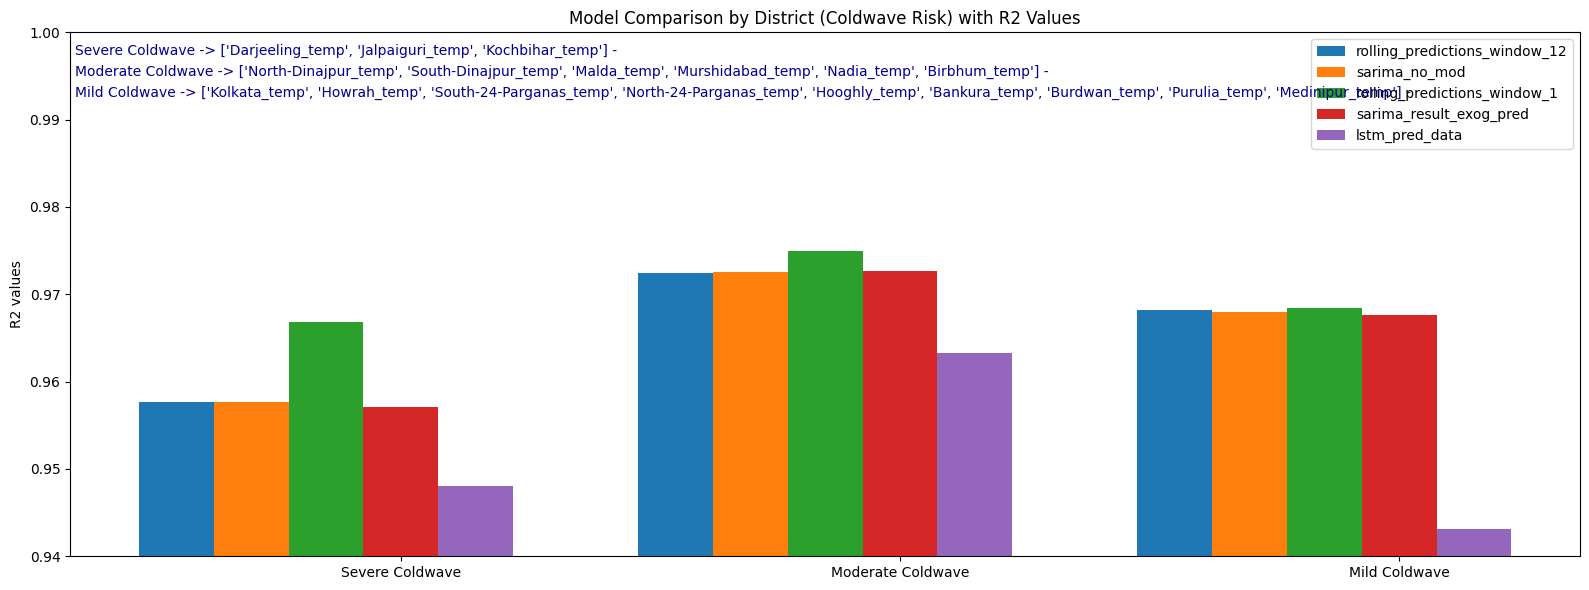

,rolling_predictions_window_12,sarima_no_mod,rolling_predictions_window_1,sarima_result_exog_pred,lstm_pred_data
Severe Coldwave,0.957683,0.957682,0.966826,0.957091,0.948010
Moderate Coldwave,0.972468,0.972555,0.974972,0.972658,0.963281
Mild Coldwave,0.968190,0.968028,0.968440,0.967674,0.943126


In [ ]:
# ❄ Coldwave Risk
coldwave_data = {
    "Severe Coldwave": ["Darjeeling_temp", "Jalpaiguri_temp", "Kochbihar_temp"],
    "Moderate Coldwave": ["North-Dinajpur_temp", "South-Dinajpur_temp", "Malda_temp",
                          "Murshidabad_temp", "Nadia_temp", "Birbhum_temp"],
    "Mild Coldwave": ["Kolkata_temp", "Howrah_temp", "South-24-Parganas_temp",
                      "North-24-Parganas_temp", "Hooghly_temp", "Bankura_temp",
                      "Burdwan_temp", "Purulia_temp", "Medinipur_temp"]
}

# ❄ COLDWAVE RISK
place_coldwave = place_analyse_r2(coldwave_data, models_mae)
place_coldwave.analyse()
place_coldwave.plot_fig(title="Model Comparison by District (Coldwave Risk) with R2 Values",
                        y_label="R2 values",
                        ylim=[.94,1],
                        seasons=coldwave_data)
place_coldwave.to_dataframe()


### 🏙 Land Use

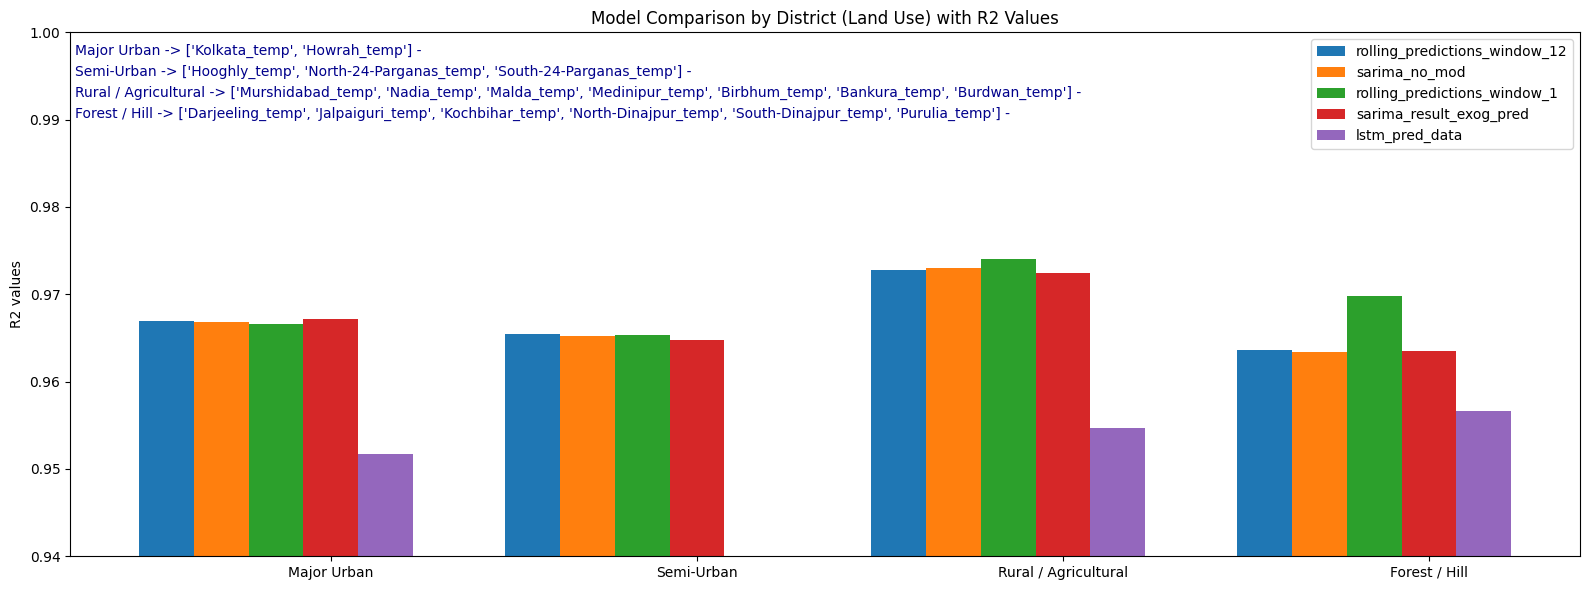

,rolling_predictions_window_12,sarima_no_mod,rolling_predictions_window_1,sarima_result_exog_pred,lstm_pred_data
Major Urban,0.966919,0.966830,0.966555,0.967191,0.951671
Semi-Urban,0.965494,0.965175,0.965300,0.964781,0.928637
Rural / Agricultural,0.972814,0.972970,0.974013,0.972393,0.954699
Forest / Hill,0.963591,0.963441,0.969861,0.963468,0.956617


In [ ]:
# 🏙 Land Use
landuse_data = {
    "Major Urban": ["Kolkata_temp", "Howrah_temp"],
    "Semi-Urban": ["Hooghly_temp", "North-24-Parganas_temp", "South-24-Parganas_temp"],
    "Rural / Agricultural": ["Murshidabad_temp", "Nadia_temp", "Malda_temp",
                            "Medinipur_temp", "Birbhum_temp", "Bankura_temp",
                            "Burdwan_temp"],
    "Forest / Hill": ["Darjeeling_temp", "Jalpaiguri_temp", "Kochbihar_temp",
                    "North-Dinajpur_temp", "South-Dinajpur_temp", "Purulia_temp"]
}

# 🏙 LAND USE
place_landuse = place_analyse_r2(landuse_data, models_mae)
place_landuse.analyse()
place_landuse.plot_fig(title="Model Comparison by District (Land Use) with R2 Values",
                    y_label="R2 values",
                    ylim=[.94,1],
                    seasons=landuse_data)
place_landuse.to_dataframe()


### 🌡 Temperature Extremes

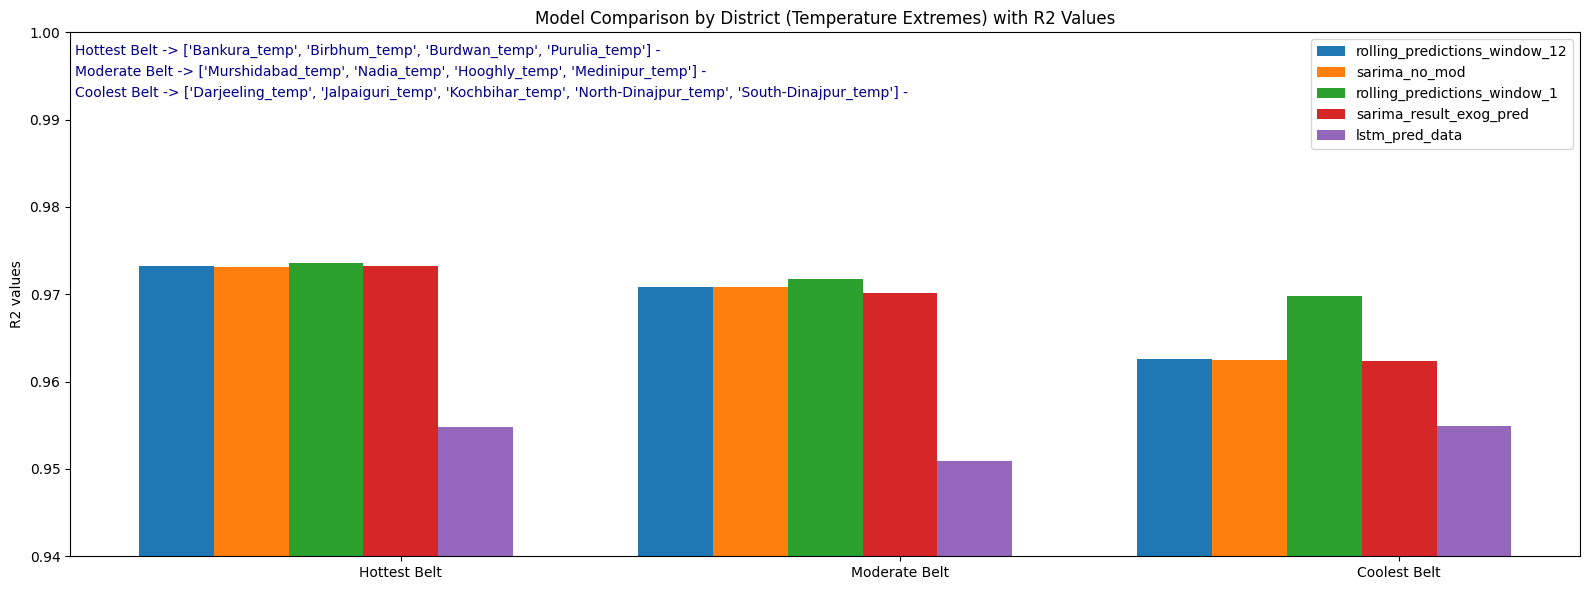

,rolling_predictions_window_12,sarima_no_mod,rolling_predictions_window_1,sarima_result_exog_pred,lstm_pred_data
Hottest Belt,0.973253,0.973139,0.973624,0.973235,0.954846
Moderate Belt,0.970817,0.970858,0.971778,0.970128,0.950923
Coolest Belt,0.962549,0.962435,0.969820,0.962340,0.954951


In [ ]:

# 🌡 Temperature Extremes
temperature_extremes_data = {
    "Hottest Belt": ["Bankura_temp", "Birbhum_temp", "Burdwan_temp", "Purulia_temp"],
    "Moderate Belt": ["Murshidabad_temp", "Nadia_temp", "Hooghly_temp", "Medinipur_temp"],
    "Coolest Belt": ["Darjeeling_temp", "Jalpaiguri_temp", "Kochbihar_temp",
                    "North-Dinajpur_temp", "South-Dinajpur_temp"]
}

# 🌡 TEMPERATURE EXTREMES
place_temperature = place_analyse_r2(temperature_extremes_data, models_mae)
place_temperature.analyse()
place_temperature.plot_fig(title="Model Comparison by District (Temperature Extremes) with R2 Values",
                        y_label="R2 values",
                        ylim=[.94,1],
                        seasons=temperature_extremes_data)
place_temperature.to_dataframe()
